## Comparing Covariance Structures

### More Complex Covariance Structures
... Importantly, decisions between these structures either has to be *theoretically* motivated, or we have to use the *data* to see which structure has the most evidence in its favour. Although we can reason about the structure of this matrix, this is often quite hard to do in practice and needs quite deep knowledge of the phenomena under question. As such, it is much more typical to consider all possible *reasonable* structures and then use model comparisons to choose between them. For the moment, we will focus on the structures, but at the end of this part of the lesson we will see how to use the *data* to choose between them.

So, in terms of *reasonable* structures, we will constraint ourselves to either *fixing* all correlations to a single value (i.e. compound symmetry) or allowing all correlations to *freely vary* (i.e. an unconstrained structure). On top of this, we can also consider *fixing* all variances to a single value (i.e. homogeneity of variance) or allowing all variances to *freely vary* (i.e. heterogeneity of variance). So this gives us 4 possible combinations of `correlation` and `weights` structures to try.

Marginal variance covariance matrix
          [,1]      [,2]     [,3]
[1,]  0.327720 -0.073454 -0.10269
[2,] -0.073454  0.682240 -0.14817
[3,] -0.102690 -0.148170  1.33340
  Standard Deviations: 0.57247 0.82598 1.1548 


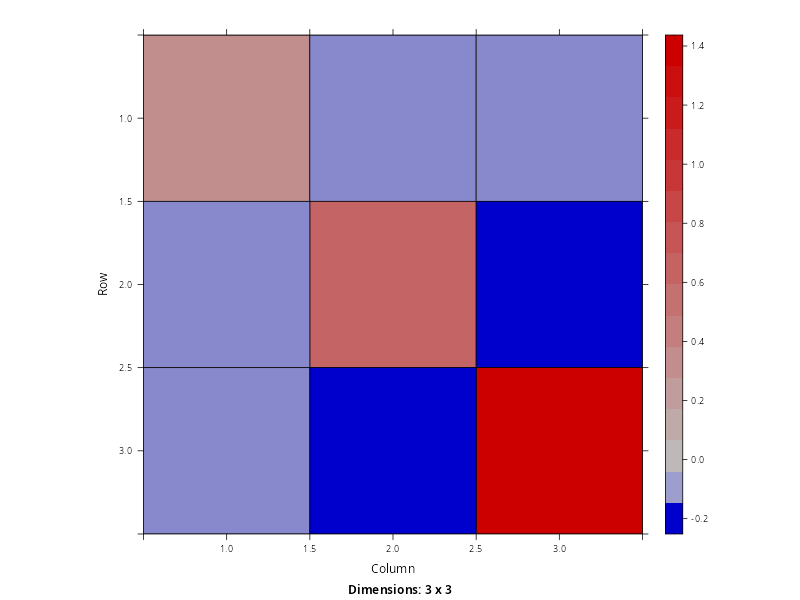

In [ ]:
gls.mod <- gls(score ~ time, correlation=corCompSymm(form= ~ 1|id), weights=varIdent(form= ~ 1|time), data=selfesteem.long)

Sigma.1 <- getVarCov(gls.mod, individual='1')
print(Sigma.1)
image(as(Sigma.1, "Matrix"))

So, here we can see that we have created a variance-covariance matrix where *both* the diagonal and off-diagonal elements are not different. However, this has been achieved using only a *single* correlation parameter. So, in reality, the correlation between the repeated measurements remains *fixed*. We can see this by converting the variance-covariance matrix into a correlation matrix, using the `cov2cor()` function 

In [ ]:
print(cov2cor(Sigma.1))

Marginal variance covariance matrix
         [,1]     [,2]     [,3]
[1,]  1.00000 -0.15534 -0.15534
[2,] -0.15534  1.00000 -0.15534
[3,] -0.15534 -0.15534  1.00000
  Standard Deviations: 1 1 1 


So, the only reason the covariance is *different* is because the correlation is being scaled differently by the different variances. So do not be mislead. This structure is exactly what you would get from allowing heterogeneity of variance, even with a fixed correlation. So despite appearances, this is still quite a *restrictive structure*.

In order to allow the correlations to *actually differ* between the repeated measurements, we need to use the `corSymm()` structure. This specifies an *unstructured* symmetric covariance matrix, where each off-diagonal element can be *any value*. This allows the data to determine the magnitude and direction of each individual correlation between the repeated measurements.

Marginal variance covariance matrix
         [,1]     [,2]     [,3]
[1,]  0.76920 -0.23823  0.21441
[2,] -0.23823  0.76920 -0.33831
[3,]  0.21441 -0.33831  0.76920
  Standard Deviations: 0.87704 0.87704 0.87704 


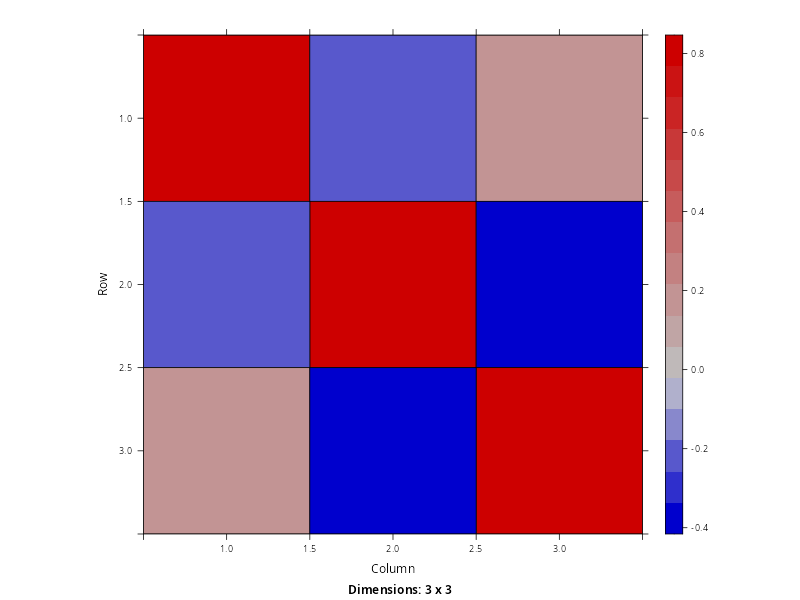

In [ ]:
gls.mod <- gls(score ~ time, correlation=corSymm(form= ~1|id), data=selfesteem.long)

Sigma.1 <- getVarCov(gls.mod, individual='1')
print(Sigma.1)
image(as(Sigma.1, "Matrix"))

This time, we have kept the variances *fixed* but have allowed the *correlation* to change between the repeated measurements.

3 x 3 Matrix of class "dsyMatrix"
           [,1]       [,2]       [,3]
[1,]  0.3044901 -0.1272857  0.2273559
[2,] -0.1272857  0.7448897 -0.5157849
[3,]  0.2273559 -0.5157849  1.3055278


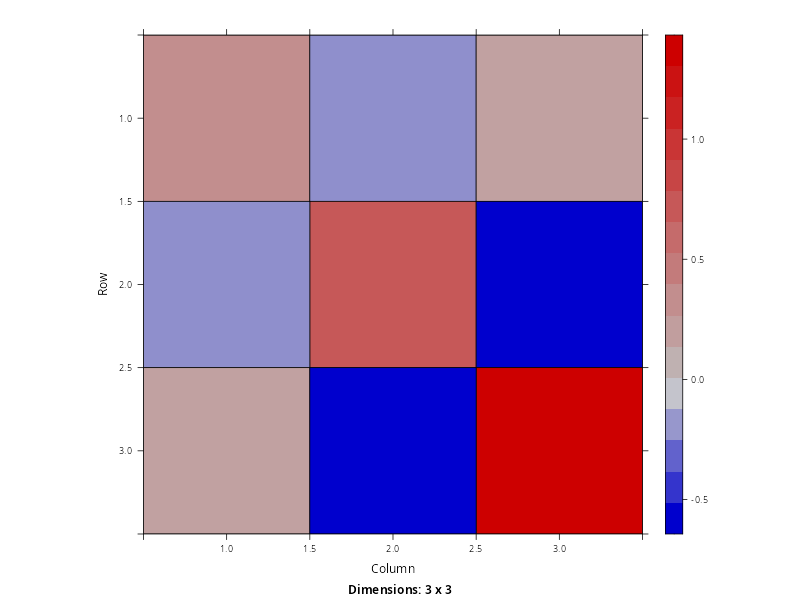

In [ ]:
gls.mod <- gls(score ~ time, correlation=corSymm(form= ~1|id), weights=varIdent(form= ~1|time), data=selfesteem.long)
Sigma.1 <- getVarCov(gls.mod, individual='1')
Sigma.1 <- as(Sigma.1, "Matrix")
print(Sigma.1)
image(Sigma.1)

## Comparing Covariance Structures

In [ ]:
gls.mod.1 <- gls(score ~ time, correlation=corCompSymm(form= ~1|id),                                  data=selfesteem.long, method='ML') # compound symmetry + homogeneity of variance
gls.mod.2 <- gls(score ~ time, correlation=corCompSymm(form= ~1|id), weights=varIdent(form= ~1|time), data=selfesteem.long, method='ML') # compound symmetry + heterogeneity of variance
gls.mod.3 <- gls(score ~ time, correlation=    corSymm(form= ~1|id),                                  data=selfesteem.long, method='ML') # general symmetric + homogeneity of variance
gls.mod.4 <- gls(score ~ time, correlation=    corSymm(form= ~1|id), weights=varIdent(form= ~1|time), data=selfesteem.long, method='ML') # general symmetric + heterogeneity of variance

anova(gls.mod.1, gls.mod.2, gls.mod.3, gls.mod.4)

          Model df      AIC      BIC    logLik   Test  L.Ratio p-value
gls.mod.1     1  5 83.60855 90.61453 -36.80427                        
gls.mod.2     2  7 83.04092 92.84930 -34.52046 1 vs 2 4.567627  0.1019
gls.mod.3     3  7 84.66271 94.47109 -35.33136                        
gls.mod.4     4  9 83.11777 95.72855 -32.55888 3 vs 4 5.544944  0.0625

The degrees of freedom here are a count of the number of parameters that need to be estimated. As each model has the same mean structure, there in always a single *intercept* parameter and two `time` parameters. The remaining count are those associated with the covariance structure. So, we can see that `gls.mod.1` has 2 covariance parameters corresponding to the constant variance and constant correlation. Both models 2 and 3 have 4 covariance parameters, corresponding to either 1 fixed variance and 3 free correlations, or 3 free variances and 1 fixed correlation. Finally, model 4 has 6 covariance parameters, corresponding to 3 free variances and 3 free correlations.

In terms of the inferential tests, these are computed as a *likelihood ratio*, but only between models that are *nested*. In other words, one model is a subset of another. In this example, this is only true of those models that share a correlation structure. So the tests here are based on assessing whether the additional flexibility added by allowing heterogeneity of variance is warranted. The $p$-value here is also based on asymptotic theory, so we have to be quite cautious in small samples. So, for our current purpose, the $p$-value here is not so useful, but could be if we were certain we wanted a specific correlation structure and our only remaining question was whether the additional `weights=` argument was needed.

So, in terms of actually deciding between these covariance structures, we turn to model comparisons procedures using the AIC and BIC. These were explored last semester as part of the [ANOVA workshop](https://github.com/PCHN63101-Advanced-Data-Skills/Model-Comparisons-ANOVA/blob/main/ANOVA-workshop.ipynb), so it may be worth quickly revising this before going any further. ...

In terms of choosing between AIC and BIC, we will favour BIC here because BIC is more focussed on the *data-generating process* than on *prediction*. It punishes complexity much harder than AIC, meaning the data really needs to suggest a complex structure is needed for BIC to allow it. This makes BIC more favourable in terms of developing a *parsimonious* model of the data-generating process.

Focussing just on BIC, we are looking for the model with the *smallest* values of BIC. In this example, it is the model with a *compound symmetric* correlation structure and *homogeneity of variance*. However, the *absolute* value of BIC is not of importance. What matters is the *difference*. Between the model with largest and smallest BIC, the change is $\Delta\text{BIC} = 95.73 - 90.61 = 5.11$. If we look back at the interpretation guidance we gave last semester for interpreting BIC (in the [ANOVA workshop](https://github.com/PCHN63101-Advanced-Data-Skills/Model-Comparisons-ANOVA/blob/main/ANOVA-workshop.ipynb)), a change of around 5 is considered *positive evidence favouring the lower-BIC model*. This is not super strong evidence, but it is suggesting that the additional complexity is *not warranted* in order to explain the data. All other comparisons indicate *smaller* changes in BIC, meaning that although the simplest covariance structure is supported, this is not a slam-dunk by any means. In this situation, we would likely use the simplest covariance structure, but we would be aware of the fact that the evidence in support of this structure is not overwhelming and that something more complex *could* be warranted if we had more data or repeated the experiment again.

## Assumptions and Visualisations

### Assumptions Plots

In [ ]:
plot.gls <- function(mod, timeseries=FALSE){

  w <- resid(mod, type="normalized")
  f <- fitted(mod)

  par(mfrow=c(2,2))

  # Residuals vs fitted
  plot(f, w, main='Residuals vs fitted')
  abline(h=0, lty=2)

  # Normal Q-Q
  qqnorm(w) 
  qqline(w)
  
  # Scale-Location
  plot(f, sqrt(abs(w)), main='Scale-Location')

  # Either plot of the ACF, or a visualisation of the marginal covariance structure
  if (timeseries==TRUE){
    acf(w)                                   
  } else {
    V <- getVarCov(mod)
    graphics::image(as.matrix(V)[nrow(V):1, ], main='Marginal covariance structure')
  }
}

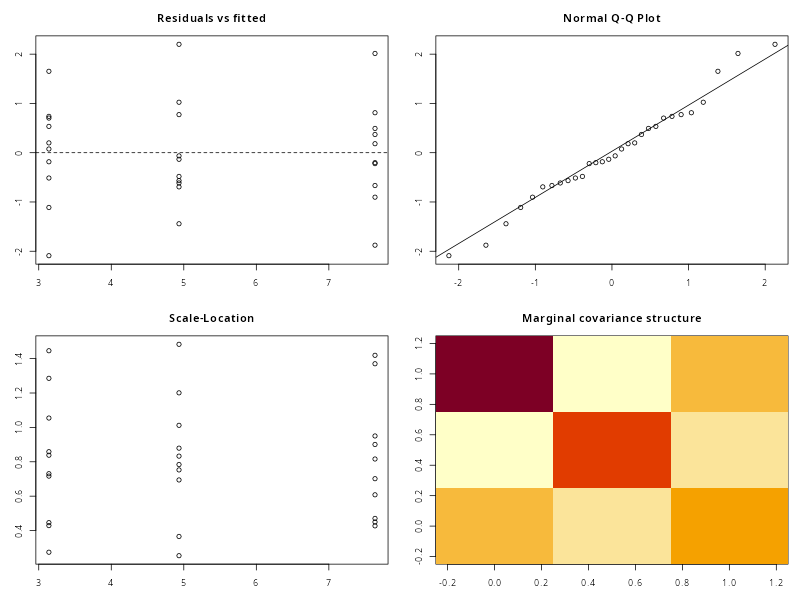

In [ ]:
plot.gls(gls.mod.4)

### Visualising the Model

## Inference Using `gls()`

### Coefficient Tests
... The key is understanding that the `gls()` function is designed to act *as if* we were using GLS instead of FGLS. So irrespective of whether we *give* `gls()` a covariance structure or *estimate* a covariance structure, the function will act the same way. This is **Option 1a** from earlier in the lesson: assume $\hat{\boldsymbol{\Sigma}} = \boldsymbol{\Sigma}$ and *ignore* the problem entirely. Once we understand this, the behaviour of `gls()` makes complete sense.

### Omnibus Tests

### Follow-up Tests

## Viewing the Complete Covariance Structure

[^weights-foot]: This is why the argument in `gls()` was `weights=`.

[^corfunc-foot]: You can look up descriptions of all of these using `?corClasses` at the prompt. 

[^white-foot]: This is sometimes known as *whitening* the data. This is a term you may come across in the neuroimaging literature, particularly in relation to how fMRI is analysed.

[^emmeans-foot]: The `mode=` option has been set to `df.error` so that the reported test matches the table from `summary()`. `emmeans` actually has some better ways of adjusting the degrees of freedom to accommodate the uncertainty in estimating $\boldsymbol{\Sigma}$, but this is a complication we will leave to one side for now.

## The GLS Covariance Matrix

In [ ]:
getVarCov(gls.mod)

Marginal variance covariance matrix
       [,1]   [,2]
[1,] 653.17 348.30
[2,] 348.30 653.17
  Standard Deviations: 25.557 25.557 

In [ ]:
library(Matrix)

gls_marginal_cov <- function(fit) {
  n <- nobs(fit)

  # Correlation blocks (list) or single matrix if no grouping
  cs <- fit$modelStruct$corStruct
  if (is.null(cs)) {
    # No correlation structure: R = I
    Rlist <- list(Matrix::Diagonal(n))
    g <- factor(rep("all", n))
  } else {
    Rlist <- corMatrix(cs)
    g <- getGroups(fit)
    if (is.null(g)) g <- factor(rep("all", n))
  }

  # Variance weights (if no varStruct, all 1s)
  vs <- fit$modelStruct$varStruct
  w <- if (is.null(vs)) rep(1, n) else varWeights(vs)

  # Indices per group, aligned to the same order as used in the fit
  idx <- split(seq_along(g), g)

  sig2 <- fit$sigma^2

  # Build block covariance matrices: Sigma_g = sig2 * D^(1/2) R D^(1/2)
  # In nlme, varWeights are (typically) inverse-SD-type weights, so Var(e_i) = sig2 / w_i^2.
  Sig_blocks <- Map(function(R, ii) {
    Dhalf <- Matrix::Diagonal(x = 1 / w[ii])
    sig2 * (Dhalf %*% R %*% Dhalf)
  }, Rlist, idx)

  Matrix::bdiag(Sig_blocks)
}

We just print the first 8 rows to show the structure for the first 4 subjects.

In [ ]:
Sigma <- gls_marginal_cov(gls.mod)
print(Sigma[1:8,1:8])

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                            
[1,] 653.1733 348.3042   .        .        .        .        .        .     
[2,] 348.3042 653.1733   .        .        .        .        .        .     
[3,]   .        .      653.1733 348.3042   .        .        .        .     
[4,]   .        .      348.3042 653.1733   .        .        .        .     
[5,]   .        .        .        .      653.1733 348.3042   .        .     
[6,]   .        .        .        .      348.3042 653.1733   .        .     
[7,]   .        .        .        .        .        .      653.1733 348.3042
[8,]   .        .        .        .        .        .      348.3042 653.1733


A more general approach is to create an *image* of $\boldsymbol{\Sigma}$, either as a whole

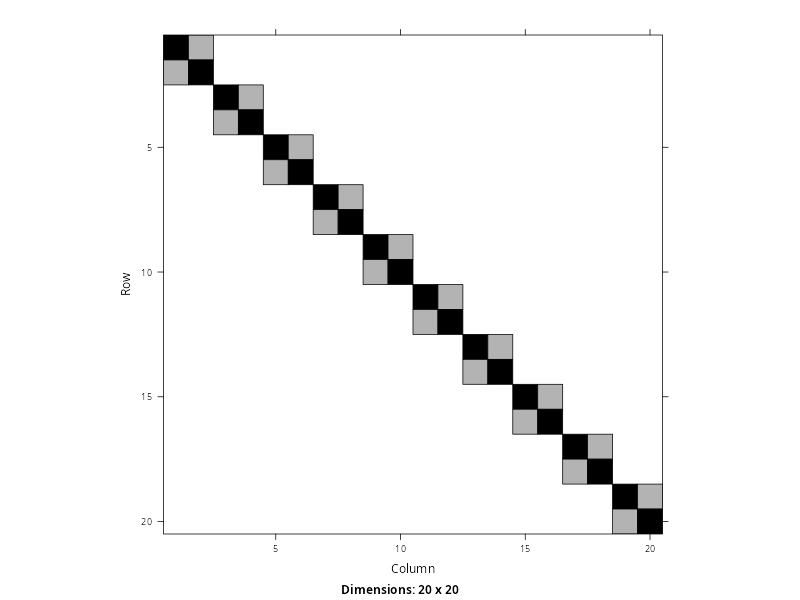

In [ ]:
image(Sigma)

Or subsetted to show the general structure more clearly

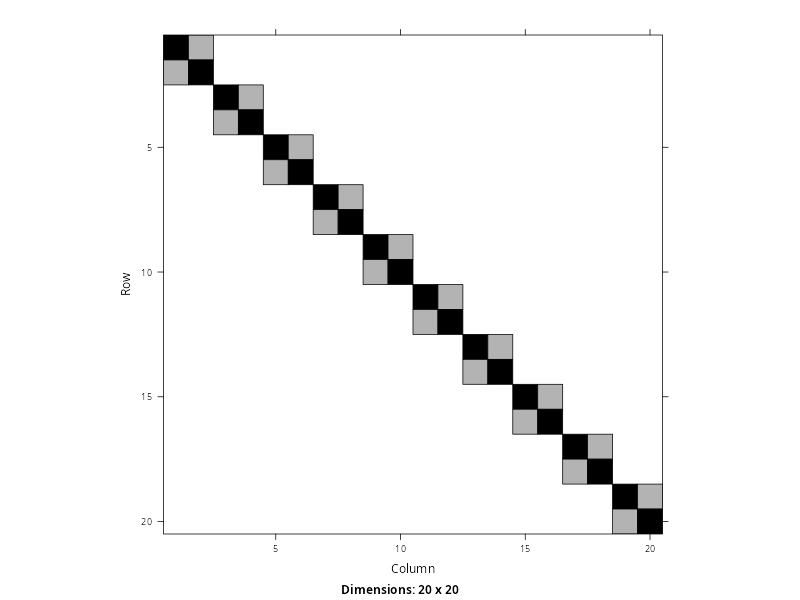

In [ ]:
image(Sigma[1:20,1:20]) # first 10 subjects

These visualisations also help to make sense of the syntax used for defining the correlation structure. For instance, if we were to specify `form=~1|cond`, this would imply a constant correlation for each level of the repeated measures condition. What would this look like? Let us see

In [ ]:
gls.mod <- gls(y.long ~ cond, correlation=corCompSymm(form=~1|cond))
image(gls_marginal_cov((gls.mod)))

: [1m[33mError[39m:[22m
[33m![39m object 'cond' not found

The data are now organised by whatever term is on the *right* of `|`, so the first 50 rows represent all the data from condition 1 and the final 50 rows represents all the data from condition 2. So we can see that this structure implies that all the data from condition 1 are correlated across subjects, and all the data from condition 2 are correlated across subjects. This is not particularly sensible or meaningful, but hopefully it makes it clear how the syntax works.

Notice, however, that GLS is ignoring the structure in the data in terms of the subjects, because it has no knowledge of them.

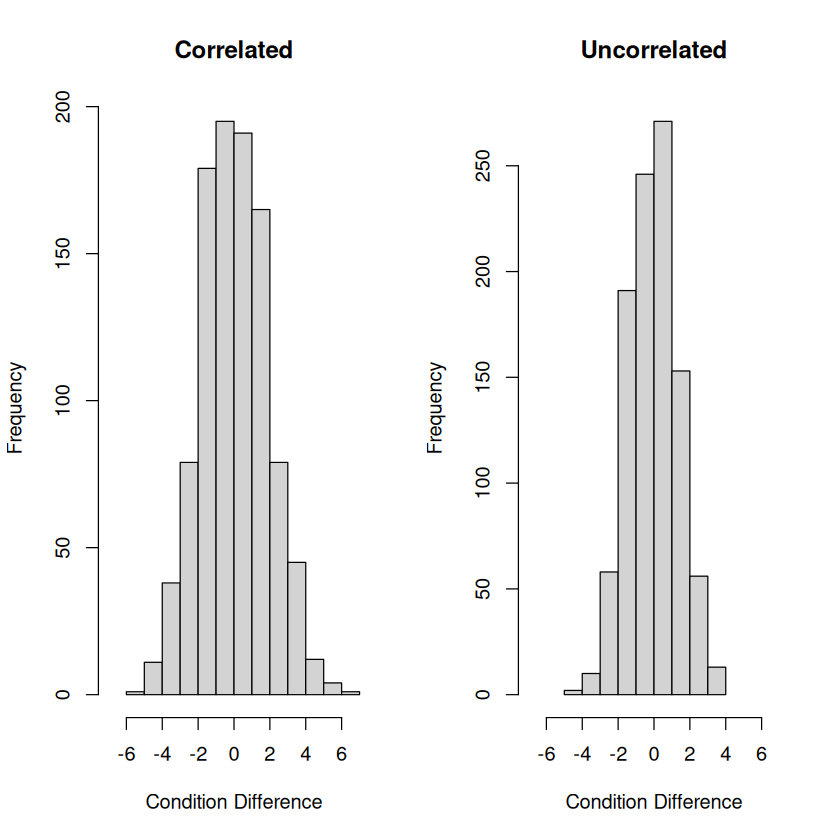

In [1]:
library(MASS)
set.seed(666) # For reproducibility

# Dependent covariance matrix
var1      <- 1             
var2      <- 1             
rho       <- -0.8          
covar     <- rho*sqrt(var1)*sqrt(var2)
Sigma_dep <- matrix(c(var1,covar,covar,var2),2,2)

# Independent covariance matric
rho         <- 0             
covar       <- rho*sqrt(var1)*sqrt(var2)
Sigma_indep <- matrix(c(var1,covar,covar,var2),2,2)

# Sample data
y_dep   <- mvrnorm(n=1000, mu=c(0,0), Sigma=Sigma_dep)
y_indep <- mvrnorm(n=1000, mu=c(0,0), Sigma=Sigma_indep)

# Differences
y_diff_dep   <- y_dep[,1]   - y_dep[,2]
y_diff_indep <- y_indep[,1] - y_indep[,2]

# Plot histograms of differences
par(mfrow=c(1,2))
hist(y_diff_dep,   xlim=c(-7,7), xlab='Condition Difference', main='Correlated')
hist(y_diff_indep, xlim=c(-7,7), xlab='Condition Difference', main='Uncorrelated')

In [ ]:
SE_dep_theory <- sqrt(1 + 1 - 2*(-0.8)) # Theoretical SE
SE_dep_est    <- sd(y_diff_dep)         # Estimated SE from simulation

round(c(SE_dep_theory, SE_dep_est), digits=3)

[1] 1.897 1.867

In [ ]:
SE_indep_theory <- sqrt(1 + 1 - 2*0) # Theoretical SE
SE_indep_est    <- sd(y_diff_indep)  # Estimated SE from simulation

round(c(SE_indep_theory, SE_indep_est), digits=3)

[1] 1.414 1.364

## Try Setting Correlation to 1. What happens?

## Univariate Conceptualisation
IS THIS CONUFSING? 

In [ ]:
library(Matrix)

Sigma.Big <- as.matrix(bdiag(Sigma,Sigma,Sigma))
Mu.Big    <- c(Mu,Mu,Mu)

y <- mvrnorm(n=1, mu=Mu.Big, Sigma=Sigma.Big)

print(y)

[1] 0.6597696 2.2942266 0.5825903 2.7284908 0.4218907 1.6509818


## Multivariate Normal Distribution with > 2 Conditions

## More General Covariance Structures
Although typical of most repeated measures experiments, a block-diagonal structure us not always the most appropriate for correlated data. Although we will not dwell on this, there are types of data *other* than traditional repeated measurements that are correlated and can be analysed using FGLS. Perhaps the most obvious is *time-series* data. For instance, imagine that you are taking continuous measurements from a single subject using a technique such as *eye-tracking*, *EEG* or *fMRI*. For each subject, we have repeated measurements that number the *hundreds* or even *thousands*. For example, the plot below shows a time-series of measurements using fMRI of a single subject at a single point in the brain.

...

The idea is that the values at each point in the time-series are close enough together that they are correlated. However, this correlation decreases the further apart in time the points are. So, two points that are *next to each other* will be strongly correlated, whereas two points at *opposite ends* of the time-series will be effectively *uncorrelated*. There is therefore a *decrease in correlation over time*. This is known as an *autoregressive* correlation structure.